### ## BBM 409 - Programming Assignment 2

* You can add as many cells as you want in-between each question.
* Please add comments to your code to explain your work.  

* Please be careful about the order of runs of cells. Doing the homework, it is likely that you will be running the cells in different orders, however, they will be evaluated in the order they appear. Hence, please try running the cells in this order before submission to make sure they work.    
* Please refer to the homework text for any implementation detail. You should also carefully review the steps explained here.
* This document is also your report. Show your work.

# **Gökdeniz Şimşek - 2210356067**


# 1. LOGISTIC REGRESSION TASK (40 points)

### 1. Data Loading and Exploration

##### Download the Bank Marketing dataset from https://drive.google.com/file/d/1t6QAtqfYLMhvv_XUnG4D_UsJcSwgF4an/view?usp=sharing  import other necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
df=pd.read_csv("portuguese_bank_marketing_numeric_random_subsampled.csv", encoding="utf-8")

In [ ]:
print("Dataset Head:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nDataset Description:")
print(df.describe())

Dataset Head:
   age  job  marital  education  default  balance  housing  loan  contact  \
0   28  9.0        0        2.0        1     1055        1     1      1.0   
1   36  4.0        1        2.0        1      520        2     1      0.0   
2   38  2.0        0        3.0        1     1314        2     2      1.0   
3   41  9.0        1        3.0        1       28        2     1      1.0   
4   27  2.0        0        3.0        1      290        1     1      1.0   

   day_of_week  month  duration  campaign  pdays  previous  poutcome  y  
0           28      1       196         1     -1         0       0.0  1  
1           23      5       110         2     -1         0       0.0  1  
2           16      7       378         2     -1         0       0.0  1  
3            4      2       358         2     -1         0       0.0  1  
4           10      8        88         1     -1         0       0.0  1  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10578 entries,

### 2. calculate correlation between target variable 'y' and other features (5 points)

In [ ]:
correlation_matrix = df.corr()
target_correlation = correlation_matrix['y'].sort_values(ascending=False)

print("Correlation between 'y' and other features:")
print(target_correlation)

Correlation between 'y' and other features:
y              1.000000
duration       0.443087
poutcome       0.291850
contact        0.219086
pdays          0.153807
balance        0.088308
previous       0.087656
education      0.082672
age            0.040038
month          0.031213
job            0.022716
default       -0.035414
day_of_week   -0.042603
marital       -0.062501
loan          -0.118816
campaign      -0.133147
housing       -0.213409
Name: y, dtype: float64


# 1.1 Implementing Logistic Regression with most correlated 2 features

###  Choose the two most correlated features with target feature 'y'

In [ ]:
X = df[["duration", "poutcome"]]
y = df['y'] - 1 # for normalization (if true_y value is 1, it will be 0; if else it is 2, it will be 1)

print(y)

0        0
1        0
2        0
3        0
4        0
        ..
10573    1
10574    1
10575    1
10576    1
10577    1
Name: y, Length: 10578, dtype: int64


In [ ]:
print("Dataset X Head:")
print(X.head())

print("\nDataset X Info:")
print(X.info())

print("\nDataset X Description:")
print(X.describe())

print("\nDataset y Head:")
print(y.head())

print("\nDataset y Info:")
print(y.info())

print("\nDataset y Description:")
print(y.describe())

Dataset X Head:
   duration  poutcome
0       196       0.0
1       110       0.0
2       378       0.0
3       358       0.0
4        88       0.0

Dataset X Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10578 entries, 0 to 10577
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   duration  10578 non-null  int64  
 1   poutcome  10578 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 165.4 KB
None

Dataset X Description:
           duration      poutcome
count  10578.000000  10578.000000
mean     380.883059      0.504160
std      353.020396      0.971481
min        0.000000      0.000000
25%      144.000000      0.000000
50%      259.000000      0.000000
75%      515.000000      1.000000
max     4918.000000      3.000000

Dataset y Head:
0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

Dataset y Info:
<class 'pandas.core.series.Series'>
RangeIndex: 10578 entries, 0 to 10577
Series name: y
Non-

###  * Define your logistic regression model as class without using any built-in libraries
### * Define necessary functions such as sigmoid, fit, predict  (10 points)

In [ ]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic Regression class
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def fit(self, X, y):
        # Start weight and bias
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        # Gradient descent
        for i in range(self.iterations):
            # Lineer model: z = w^T * X + b
            linear_model = np.dot(X, self.weights) + self.bias

            # Prediction: sigmoid(z)
            y_predicted = sigmoid(linear_model)

            # Gradients
            dw = (1 / len(y)) * np.dot(X.T, (y_predicted - y))
            db = (1 / len(y)) * np.sum(y_predicted - y)

            # Updating weight and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        # Lineer model: z = w^T * X + b
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = sigmoid(linear_model)
        # Predicted class
        return [1 if i >= 0.5 else 0 for i in y_predicted]

Split the dataset into a training set and a validation set (80% training and 20% validation).

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train set: {X_train.shape}, {y_train.shape}\nTest set: {X_val.shape}, {y_val.shape}")

Train set: (8462, 2), (8462,)
Test set: (2116, 2), (2116,)


Scale the features using StandardScaler

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

print("Features are standardized.")

Features are standardized.


* Initialize and train the custom logistic regression model

In [ ]:
# Start the Logistic Regression model
model = LogisticRegressionScratch(learning_rate=0.01, iterations=1000)

# Train model
model.fit(X_train, y_train)

print("Model trained succesfully")

Model trained succesfully


* Make predictions on the validation set

In [ ]:
y_pred = model.predict(X_val)
print(y_pred[:10])
print(y_val[:10])

[1, 1, 1, 0, 1, 1, 1, 0, 0, 1]
5357    1
6595    1
9605    1
8147    1
7780    1
9773    1
5733    1
469     0
439     0
5471    1
Name: y, dtype: int64


### Evaluate the model's performance, print classification report and confusion matrix  (5 points)

In [ ]:
def calculate_accuracy(y_true, y_pred):
    # Check and count correct guesses
    correct_predictions = sum(y_t == y_p for y_t, y_p in zip(y_true, y_pred))
    # Calculate the Accuracy
    accuracy = (correct_predictions / len(y_true))
    return accuracy

def calculate_confusion_matrix(y_true, y_pred):
    tp = 0  # True Positives
    tn = 0  # True Negatives
    fp = 0  # False Positives
    fn = 0  # False Negatives

    for true, pred in zip(y_true, y_pred):
        if true == 1 and pred == 1:  # True 1, Pred 1
            tp += 1
        elif true == 0 and pred == 0:  # True 0, Pred 0
            tn += 1
        elif true == 0 and pred == 1:  # True 0, Pred 1
            fp += 1
        elif true == 1 and pred == 0:  # True 1, Pred 0
            fn += 1

    return tp, tn, fp, fn

def evaluate_model(y_true, y_pred):
    # Accuracy
    accuracy = calculate_accuracy(y_true, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # Confusion Matrix
    tp, tn, fp, fn = calculate_confusion_matrix(y_true, y_pred)

    print("\nConfusion Matrix:")
    print(f"[TP: {tp}  FP: {fp}\n FN: {fn}  TN: {tn}]")

    # Precision, Recall ve F1-Score
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    print("\nClassification Report:")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1_score:.4f}")

# Evaluate the model on the validation set
evaluate_model(y_val, y_pred)

Accuracy: 0.7604

Confusion Matrix:
[TP: 704  FP: 187
 FN: 320  TN: 905]

Classification Report:
Precision: 0.7901
Recall: 0.6875
F1-Score: 0.7352


### Print decision boundaries as in PA1 (5 points)

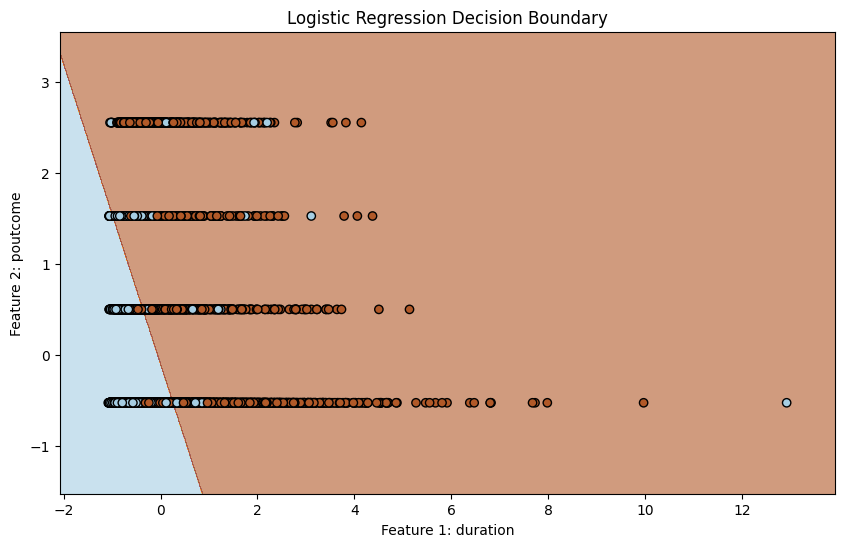

In [ ]:
def plot_decision_boundary(X, y, model):
    # Minimum and maximum values ​​for plotting the graph
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Prepare a grid to create the decision boundary
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Make predictions for all grid points
    grid = np.c_[xx.ravel(), yy.ravel()]
    predictions = np.array(model.predict(grid))
    predictions = predictions.reshape(xx.shape)

    # Draw the data and decision boundary
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, predictions, alpha=0.6, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
    plt.title("Logistic Regression Decision Boundary")
    plt.xlabel("Feature 1: duration")
    plt.ylabel("Feature 2: poutcome")
    plt.show()

# Draw the decision boundary on the training set on which the model was trained
plot_decision_boundary(X_train, y_train, model)

# 1.2 Implementing Logistic Regression using all features.


* Redefine input and target variables. In this experiment, you will use all input features in the dataset.

In [ ]:
X_all = df.iloc[:, :-1]  # X Features: all columns without the last column
y_all = df.iloc[:, -1] - 1   # y Target: last column (with normalization)

print(y)

0        0
1        0
2        0
3        0
4        0
        ..
10573    1
10574    1
10575    1
10576    1
10577    1
Name: y, Length: 10578, dtype: int64


In [ ]:
print("Dataset X Head:")
print(X_all.head())

print("\nDataset X Info:")
print(X_all.info())

print("\nDataset X Description:")
print(X_all.describe())

print("\nDataset y Head:")
print(y_all.head())

print("\nDataset y Info:")
print(y_all.info())

print("\nDataset y Description:")
print(y_all.describe())

Dataset X Head:
   age  job  marital  education  default  balance  housing  loan  contact  \
0   28  9.0        0        2.0        1     1055        1     1      1.0   
1   36  4.0        1        2.0        1      520        2     1      0.0   
2   38  2.0        0        3.0        1     1314        2     2      1.0   
3   41  9.0        1        3.0        1       28        2     1      1.0   
4   27  2.0        0        3.0        1      290        1     1      1.0   

   day_of_week  month  duration  campaign  pdays  previous  poutcome  
0           28      1       196         1     -1         0       0.0  
1           23      5       110         2     -1         0       0.0  
2           16      7       378         2     -1         0       0.0  
3            4      2       358         2     -1         0       0.0  
4           10      8        88         1     -1         0       0.0  

Dataset X Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10578 entries, 0 to 10577
Da

* Split the dataset into a training set and a validation set (80% training and 20% validation).

In [ ]:
X_train_all, X_val_all, y_train_all, y_val_all = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

print(f"Train set: {X_train_all.shape}, {y_train_all.shape}\nTest set: {X_val_all.shape}, {y_val_all.shape}")

Train set: (8462, 16), (8462,)
Test set: (2116, 16), (2116,)


* Scale the features using StandardScaler

In [ ]:
scaler = StandardScaler()

X_train_all = scaler.fit_transform(X_train_all)
X_val_all = scaler.transform(X_val_all)

print("Features are standardized.")

Features are standardized.


### Initialize and train the custom logistic regression model.

In [ ]:
# Start the Logistic Regression model
model = LogisticRegressionScratch(learning_rate=0.01, iterations=1000)

# Train model
model.fit(X_train_all, y_train_all)

print("Model trained succesfully")

Model trained succesfully


* Make predictions on the validation set

In [ ]:
y_pred_all = model.predict(X_val_all)
print(y_pred_all[:10])
print(y_val_all[:10])

[1, 1, 1, 0, 1, 1, 1, 0, 1, 1]
5357    1
6595    1
9605    1
8147    1
7780    1
9773    1
5733    1
469     0
439     0
5471    1
Name: y, dtype: int64


### Evaluate the model's performance, print classification report and confusion matrix  (5 points)

In [ ]:
# Evaluate the model on the validation set
evaluate_model(y_val_all, y_pred_all)

Accuracy: 0.7840

Confusion Matrix:
[TP: 780  FP: 213
 FN: 244  TN: 879]

Classification Report:
Precision: 0.7855
Recall: 0.7617
F1-Score: 0.7734


### Briefly explain the impact of the number of features on the learning ability of the model. (5 points)

The number of features in a dataset significantly affects a machine learning model's learning ability. Too many features can lead to the curse of dimensionality and increase the risk of overfitting. Conversely, features that are too few may result in underfitting. Striking a balance is crucial, as excessive feature reduction might discard important information.

### After completing the SVM and logistic regression tasks, the best results of the experiments with the SVM and Logistic regression models will be compared in a table. (5 points)

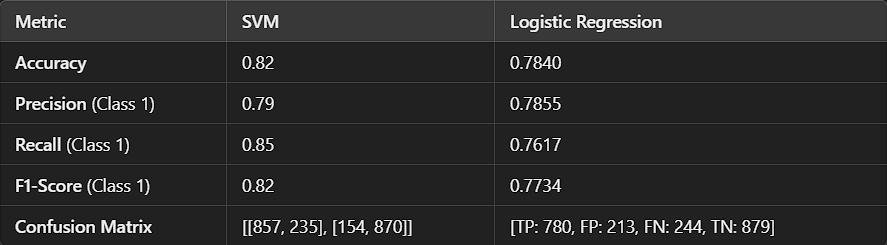

The SVM model outperformed the Logistic Regression model in terms of accuracy (82% vs. 78.4%), recall (85% vs. 76.17%), and F1-Score (82% vs. 77.34%). While Logistic Regression provided slightly better precision (78.55% vs. 79% for SVM), the SVM model was more effective in reducing false negatives (154 for SVM vs. 244 for Logistic Regression). Overall, the SVM model demonstrated more balanced and superior performance.

# 2. Support Vector Machine Task  (30 points)

* Define your SVM model using sklearn

## 2.1 implementing svm with grid search cv using all features (10 points)

* Define features and target variable, you will use all features of dataset in this task

In [ ]:
X_svm = df.iloc[:, :-1]  # X Features: all columns without the last column
y_svm = df.iloc[:, -1] - 1   # y Target: last column (with normalization)

# Display first few rows of the features and target variable
print(X_svm.head())
print(y_svm.head())

   age  job  marital  education  default  balance  housing  loan  contact  \
0   28  9.0        0        2.0        1     1055        1     1      1.0   
1   36  4.0        1        2.0        1      520        2     1      0.0   
2   38  2.0        0        3.0        1     1314        2     2      1.0   
3   41  9.0        1        3.0        1       28        2     1      1.0   
4   27  2.0        0        3.0        1      290        1     1      1.0   

   day_of_week  month  duration  campaign  pdays  previous  poutcome  
0           28      1       196         1     -1         0       0.0  
1           23      5       110         2     -1         0       0.0  
2           16      7       378         2     -1         0       0.0  
3            4      2       358         2     -1         0       0.0  
4           10      8        88         1     -1         0       0.0  
0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64


* Split the dataset into a training set and a validation set (80% training and 20% validation).

In [ ]:
X_train_svm, X_val_svm, y_train_svm, y_val_svm = train_test_split(X_svm, y_svm, test_size=0.2, random_state=42)

print(f"Train set: {X_train_svm.shape}, {y_train_svm.shape}\nTest set: {X_val_svm.shape}, {y_val_svm.shape}")

Train set: (8462, 16), (8462,)
Test set: (2116, 16), (2116,)


* Scale the features using StandardScaler

In [ ]:
scaler = StandardScaler()

X_train_svm = scaler.fit_transform(X_train_svm)
X_val_svm = scaler.transform(X_val_svm)

print("Features are standardized.")

Features are standardized.


#### Implement GridSearchCV  (5 points)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

* Initialize the SVM classifier

In [ ]:
svm_model = SVC()

* Train the SVM classifier with the best parameters found from grid search


In [ ]:
# Define the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10],               # Regularization parameter
    'kernel': ['linear', 'rbf'],     # Types of kernel
    'gamma': ['scale', 'auto', 0.1]  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
}

# Initialize GridSearchCV with the SVM model and parameter grid
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
# Fit the GridSearchCV to the training data
grid_search.fit(X_train_svm, y_train_svm)

# Print the best parameters found by GridSearchCV
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Hyperparameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.8310


* Make predictions on the validation set using the best model


In [ ]:
# Get the best model from GridSearchCV
best_svm_model = grid_search.best_estimator_

# Make predictions on the validation set
y_pred_svm = best_svm_model.predict(X_val_svm)

# Display first few predictions
print(f"Predictions on Validation Set: {y_pred_svm[:10]}")

Predictions on Validation Set: [1 1 1 0 1 1 1 0 1 1]


#### Evaluate the model's performance, print classification report and confusion matrix and best parameters found from GridSearchCV  (5 points)

In [ ]:
# Print the classification report
print("\nClassification Report:")
print(classification_report(y_val_svm, y_pred_svm))

# Print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_val_svm, y_pred_svm))

# Display the best parameters found from GridSearchCV
print("\nBest Parameters from GridSearchCV:")
print(grid_search.best_params_)


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.78      0.82      1092
           1       0.79      0.85      0.82      1024

    accuracy                           0.82      2116
   macro avg       0.82      0.82      0.82      2116
weighted avg       0.82      0.82      0.82      2116


Confusion Matrix:
[[857 235]
 [154 870]]

Best Parameters from GridSearchCV:
{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


## 2.2 implementing svm with most correlated 2 features (10 points)

#### Choose the two most correlated features with target feature 'y'

In [ ]:
X_svm_mst = df[["duration", "poutcome"]]
y_svm_mst = df['y'] - 1 # with normalization

* Split the dataset into a training set and a validation set (80% training and 20% validation).

In [ ]:
X_train_svm_mst, X_val_svm_mst, y_train_svm_mst, y_val_svm_mst = train_test_split(X_svm_mst, y_svm_mst, test_size=0.2, random_state=42)

print(f"Train set: {X_train_svm_mst.shape}, {y_train_svm_mst.shape}\nTest set: {X_val_svm_mst.shape}, {y_val_svm_mst.shape}")

Train set: (8462, 2), (8462,)
Test set: (2116, 2), (2116,)


* Scale the features using StandardScaler

In [ ]:
scaler = StandardScaler()

X_train_svm_mst = scaler.fit_transform(X_train_svm_mst)

X_val_svm_mst = scaler.transform(X_val_svm_mst)

print("Features are standardized.")

Features are standardized.


*  Initialize the SVM classifier, assign 'C' and 'kernel' parameters from the best hyperparameters you found from GridSearchCV

In [ ]:
# Use the best parameters found from 2.1
best_params = {
    'C': 0.1,         # Regularization parameter
    'gamma': 'scale', # Kernel coefficient
    'kernel': 'rbf'   # Kernel type
}

# Initialize the SVM classifier with the best parameters
svm_model_mst = SVC(C=best_params['C'], gamma=best_params['gamma'], kernel=best_params['kernel'])

# Display the initialized model
print(f"SVM Model initialized with C={best_params['C']}, gamma={best_params['gamma']}, kernel={best_params['kernel']}")

SVM Model initialized with C=0.1, gamma=scale, kernel=rbf


* Train the SVM classifier

In [ ]:
svm_model_mst.fit(X_train_svm_mst, y_train_svm_mst)

print("SVM Model trained successfully.")

SVM Model trained successfully.


* Make predictions on the validation set

In [ ]:
y_pred_svm_mst = svm_model_mst.predict(X_val_svm_mst)

print(f"Predictions on the validation set: {y_pred_svm_mst[:10]}")

Predictions on the validation set: [1 1 1 0 1 1 1 0 0 1]


#### Evaluate the model's performance, print classification report and confusion matrix  (5 points)

In [ ]:
print("\nClassification Report:")
print(classification_report(y_val_svm_mst, y_pred_svm_mst))

print("\nConfusion Matrix:")
print(confusion_matrix(y_val_svm_mst, y_pred_svm_mst))


Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.82      0.78      1092
           1       0.78      0.71      0.74      1024

    accuracy                           0.76      2116
   macro avg       0.77      0.76      0.76      2116
weighted avg       0.77      0.76      0.76      2116


Confusion Matrix:
[[890 202]
 [297 727]]


##### Visualize decision boundary and support vectors (5 points)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


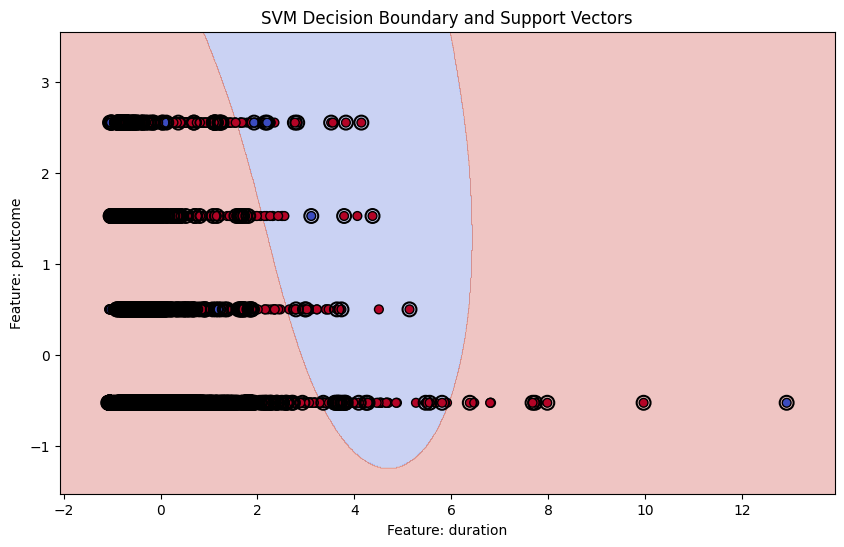

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_svm_decision_boundary(X, y, model, scaler):
    """
    X: Scaled features (numpy array)
    y: Target variable
    model: Trained SVM model
    scaler: StandardScaler object used to scale X
    """
    # Create meshgrid for decision boundary visualization
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Standardize the meshgrid points
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    grid_points_scaled = scaler.transform(grid_points)  # Scale the grid points

    # Predict class for each point on the grid
    Z = model.predict(grid_points_scaled)
    Z = Z.reshape(xx.shape)  # Reshape predictions for contour plotting

    # Plot decision boundary
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)  # Decision boundary regions

    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.coolwarm, edgecolors='k')

    # Highlight support vectors
    support_vectors = model.support_vectors_
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, facecolors='none', edgecolors='k', linewidth=1.5)

    # Add labels and title
    plt.title("SVM Decision Boundary and Support Vectors")
    plt.xlabel("Feature: duration")
    plt.ylabel("Feature: poutcome")
    plt.show()

# Call the function to visualize decision boundary
plot_svm_decision_boundary(X_train_svm_mst, y_train_svm_mst, svm_model_mst, scaler)

## 2.3 implementing svm with least correlated 2 features (10 points)

#### Choose the two least correlated features with target feature 'y'

In [ ]:
X_svm_least = df[["month", "job"]]
y_svm_least = df['y'] - 1 # with normalization

* Split the dataset into a training set and a validation set (80% training and 20% validation).

In [ ]:
X_train_svm_least, X_val_svm_least, y_train_svm_least, y_val_svm_least = train_test_split(X_svm_least, y_svm_least, test_size=0.2, random_state=42)

print(f"Train set: {X_train_svm_least.shape}, {y_train_svm_least.shape}\nTest set: {X_val_svm.shape}, {y_val_svm.shape}")

Train set: (8462, 2), (8462,)
Test set: (2116, 16), (2116,)


* Scale the features using StandardScaler

In [ ]:
scaler = StandardScaler()

X_train_svm_least = scaler.fit_transform(X_train_svm_least)

X_val_svm_least = scaler.transform(X_val_svm_least)

print("Features are standardized.")

Features are standardized.


*  Initialize the SVM classifier, assign 'C' and 'kernel' parameters from the best hyperparameters you found from GridSearchCV

In [ ]:
# Use the best parameters found from 2.1
best_params = {
    'C': 0.1,         # Regularization parameter
    'gamma': 'scale', # Kernel coefficient
    'kernel': 'rbf'   # Kernel type
}

# Initialize the SVM classifier with the best parameters
svm_model_least = SVC(C=best_params['C'], gamma=best_params['gamma'], kernel=best_params['kernel'])

# Display the initialized model
print(f"SVM Model initialized with C={best_params['C']}, gamma={best_params['gamma']}, kernel={best_params['kernel']}")

SVM Model initialized with C=0.1, gamma=scale, kernel=rbf


* Train the SVM classifier

In [ ]:
svm_model_least.fit(X_train_svm_least, y_train_svm_least)

print("SVM Model trained successfully.")

SVM Model trained successfully.


* Make predictions on the validation set

In [ ]:
y_pred_svm_least = svm_model_least.predict(X_val_svm_least)

print(f"Predictions on the validation set: {y_pred_svm_least[:10]}")

Predictions on the validation set: [0 1 1 0 0 0 0 0 1 0]


#### Evaluate the model's performance, print classification report and confusion matrix  (5 points)

In [ ]:
print("\nClassification Report:")
print(classification_report(y_val_svm_least, y_pred_svm_least))

print("\nConfusion Matrix:")
print(confusion_matrix(y_val_svm_least, y_pred_svm_least))


Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.71      0.65      1092
           1       0.62      0.50      0.55      1024

    accuracy                           0.61      2116
   macro avg       0.61      0.60      0.60      2116
weighted avg       0.61      0.61      0.60      2116


Confusion Matrix:
[[770 322]
 [508 516]]


##### Visualize decision boundary and support vectors(5 points)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


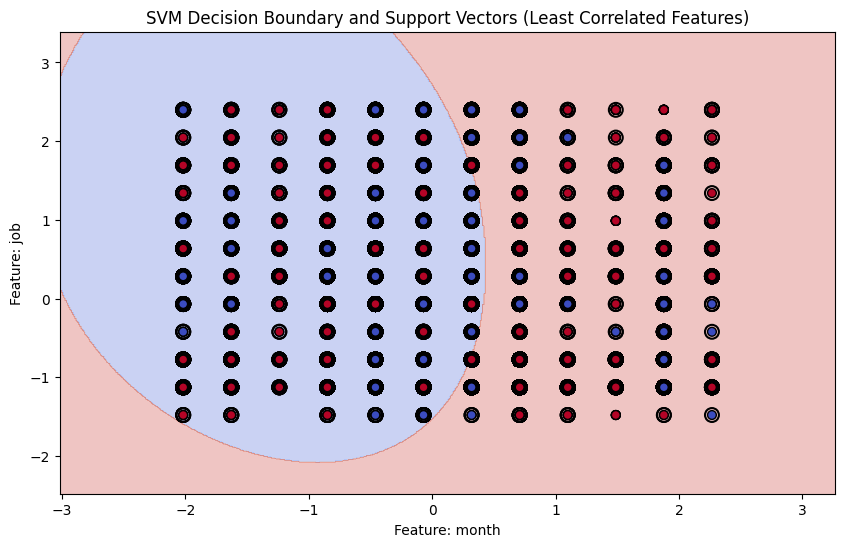

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_svm_decision_boundary(X, y, model, scaler):
    """
    X: Scaled features (numpy array)
    y: Target variable
    model: Trained SVM model
    scaler: StandardScaler object used to scale X
    """
    # Create meshgrid for decision boundary visualization
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Standardize the meshgrid points
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    grid_points_scaled = scaler.transform(grid_points)  # Scale the grid points

    # Predict class for each point on the grid
    Z = model.predict(grid_points_scaled)
    Z = Z.reshape(xx.shape)  # Reshape predictions for contour plotting

    # Plot decision boundary
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)  # Decision boundary regions

    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.coolwarm, edgecolors='k')

    # Highlight support vectors
    support_vectors = model.support_vectors_
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, facecolors='none', edgecolors='k', linewidth=1.5)

    # Add labels and title
    plt.title("SVM Decision Boundary and Support Vectors (Least Correlated Features)")
    plt.xlabel("Feature: month")
    plt.ylabel("Feature: job")
    plt.show()

# Call the function to visualize decision boundary
plot_svm_decision_boundary(X_train_svm_least, y_train_svm_least, svm_model_least, scaler)

# 3. Decision Tree Task (30 points)

* Define your decision tree model using sklearn. Also you should define other necessary modules for visualize the decision tree

### Download the dataset from https://drive.google.com/file/d/1D3peA-TzIqJqZDDKTlK0GQ7Ya6FIemFv/view?usp=sharing

### import other necessary libraries

In [5]:
df=pd.read_csv("weights_bmi_6classes_updated.csv", encoding="utf-8")

* Define features and target variable, you will use all features of dataset in this task

In [6]:
X_tree = df.iloc[:, :-1]
y_tree = df.iloc[:, -1] - 1   # with normalization

* Split the dataset into a training set and a validation set (80% training and 20% validation).

In [7]:
X_train_tree, X_val_tree, y_train_tree, y_val_tree = train_test_split(X_tree, y_tree, test_size=0.2, random_state=42)

print(f"Train set: {X_train_tree.shape}, {y_train_tree.shape}\nTest set: {X_val_tree.shape}, {y_val_tree.shape}")

Train set: (2688, 8), (2688,)
Test set: (672, 8), (672,)


* Initialize the Decision Tree classifier

In [8]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt_classifier = DecisionTreeClassifier(random_state=42)

print(f"Decision Tree Classifier initialized: {dt_classifier}")

Decision Tree Classifier initialized: DecisionTreeClassifier(random_state=42)


* Train the Decision Tree classifier

In [9]:
# Train the Decision Tree classifier with the training data
dt_classifier.fit(X_train_tree, y_train_tree)

print("Decision Tree model trained successfully.")

Decision Tree model trained successfully.


* Make predictions on the validation set

In [10]:
# Make predictions on the validation set
y_pred_tree = dt_classifier.predict(X_val_tree)

print(f"Predictions on Validation Set: {y_pred_tree[:10]}")

Predictions on Validation Set: [-1 -1 -1 -1 -1 -1  1 -1 -1 -1]


#### Evaluate the model's performance, print classification report and confusion matrix  (10 points)

In [11]:
# Print the classification report to evaluate the model's performance
print("\nClassification Report:")
print(classification_report(y_val_tree, y_pred_tree))

# Print the confusion matrix to evaluate the model's performance in more detail
print("\nConfusion Matrix:")
print(confusion_matrix(y_val_tree, y_pred_tree))


Classification Report:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       499
           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        93
           2       1.00      1.00      1.00         8

    accuracy                           1.00       672
   macro avg       1.00      1.00      1.00       672
weighted avg       1.00      1.00      1.00       672


Confusion Matrix:
[[499   0   0   0]
 [  0  72   0   0]
 [  0   0  93   0]
 [  0   0   0   8]]


#### Visualize the Decision Tree, show clearly class number, gini value etc.  (10 points)


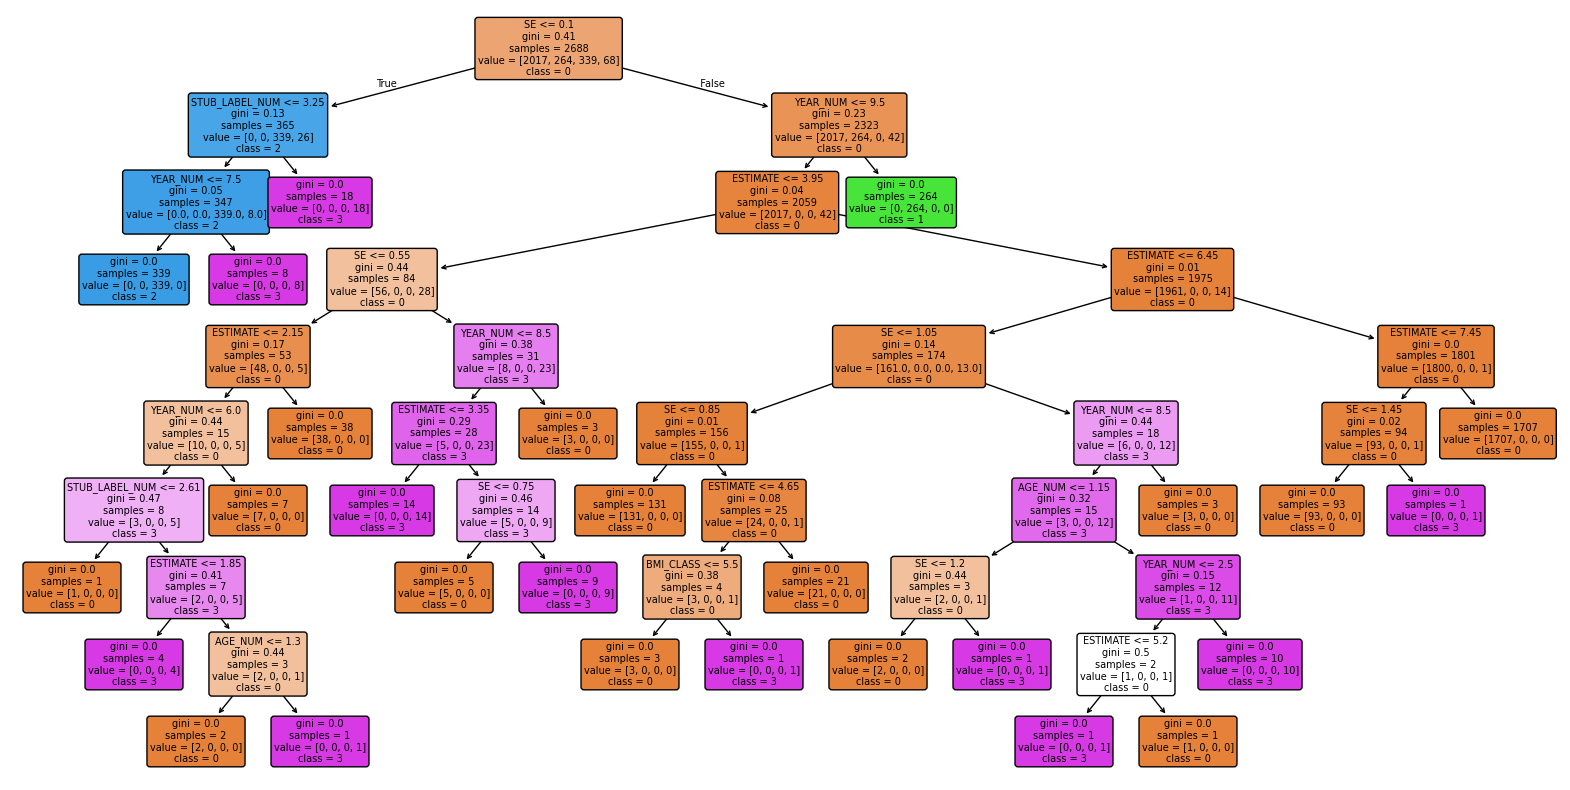

In [17]:
# Visualize the Decision Tree
plt.figure(figsize=(20,10))  # Set the figure size for the tree
plot_tree(dt_classifier,
          filled=True,
          feature_names=X_tree.columns,
          class_names=[str(i) for i in range(4)],  # Display class numbers (adjust to your classes)
          rounded=True,
          proportion=False,
          precision=2,
          fontsize=7)

# Show the plot
plt.show()

### Explain briefly the question. What is the role of gini in decision tree? (10 points)


The Gini Index measures the impurity or homogeneity of a dataset and plays a key role in decision trees by determining the best feature and threshold for splitting nodes. A Gini value of 0 indicates pure nodes (all samples belong to a single class), while higher values indicate more mixed classes. At each step, the decision tree algorithm selects the split that minimizes the Gini impurity, creating child nodes that are as homogeneous as possible. This process continues recursively, helping the tree to better classify the data while reducing uncertainty.